<a href="https://colab.research.google.com/github/IshmamR/capstone/blob/main/capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
root_dir = "/content/drive/MyDrive/capstone"

In [ ]:
!unzip /content/drive/MyDrive/capstone/baad16-4.zip -d /content/drive/MyDrive/capstone/baad16-4

Archive:  /content/drive/MyDrive/capstone/baad16-4.zip
  inflating: /content/drive/MyDrive/capstone/baad16-4/OurDataset_test.csv  
  inflating: /content/drive/MyDrive/capstone/baad16-4/OurDataset_train.csv  


In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
train_csv = root_dir + "/baad16-4/OurDataset_train.csv"
train_csv

'/content/drive/MyDrive/capstone/baad16-4/OurDataset_train.csv'

In [ ]:
df = pd.read_csv(train_csv)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14374 entries, 0 to 14373
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     14374 non-null  object
 1   text      14374 non-null  object
 2   is_valid  14374 non-null  bool  
dtypes: bool(1), object(2)
memory usage: 238.8+ KB


In [ ]:
df['is_valid'].value_counts()

False    14374
Name: is_valid, dtype: int64

In [ ]:
df = df.drop('is_valid', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14374 entries, 0 to 14373
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   14374 non-null  object
 1   text    14374 non-null  object
dtypes: object(2)
memory usage: 224.7+ KB


In [ ]:
df.head()

label                                               text
0  shunil_gongopaddhay  থেকে কত দূরে চলে এসেছে ভরত। সে হেসে উঠল আপন মন...
1        humayun_ahmed  এতে ভয় কমে যায়। বল একটা গল্প।’ ‘তুমি বল।’ আনিস...
2             shomresh  হবে। ওই দেখুন ওর এক চোখ কানা। ডান দিকটা দিয়ে দ...
3        humayun_ahmed  বললাম, আপনি ওর গায়ে হাত দিলেন কেন? ষণ্ডাগণ্ডা ...
4        humayun_ahmed  হত! আবার চাদর মুড়ি দিয়ে নিজেকে গুটিয়ে ফেলি। যে...

In [ ]:
df['label'].value_counts()

humayun_ahmed          3612
shunil_gongopaddhay    1570
shomresh               1126
shorotchandra          1051
robindronath           1007
MZI                     880
shirshendu              838
toslima_nasrin          745
shordindu               711
shottojit_roy           680
tarashonkor             620
bongkim                 450
nihar_ronjon_gupta      381
manik_bandhopaddhay     376
nazrul                  179
zahir_rayhan            148
Name: label, dtype: int64

In [ ]:
!pip install bangla-stemmer

In [ ]:
from bangla_stemmer.stemmer.stemmer import BanglaStemmer
from IPython.display import clear_output
from tqdm import tqdm

In [ ]:
stmr = BanglaStemmer()
def stem_text (x):
  words=x.split(' ')
  stm = stmr.stem(words)
  words=(' ').join(stm)
  return words

In [ ]:
stem_text_vectorized = np.vectorize(stem_text)

In [ ]:
df['stemmed'] = stem_text_vectorized(df['text'])

In [ ]:
df.head()

label                                               text  \
0  shunil_gongopaddhay  থেকে কত দূরে চলে এসেছে ভরত। সে হেসে উঠল আপন মন...   
1        humayun_ahmed  এতে ভয় কমে যায়। বল একটা গল্প।’ ‘তুমি বল।’ আনিস...   
2             shomresh  হবে। ওই দেখুন ওর এক চোখ কানা। ডান দিকটা দিয়ে দ...   
3        humayun_ahmed  বললাম, আপনি ওর গায়ে হাত দিলেন কেন? ষণ্ডাগণ্ডা ...   
4        humayun_ahmed  হত! আবার চাদর মুড়ি দিয়ে নিজেকে গুটিয়ে ফেলি। যে...   

                                             stemmed  
0  থেক কত দূরে চলে এস ভরত। সে হাস উঠল আপন মনে। বা...  
1  এত ভয় কমে যায়। বল এক গল্প।’ ‘তুমি বল।’ আন দীর্...  
2  হবে। ওই দেখুন ওর এক চোখ কানা। ডান দিক দিয়ে দেখ...  
3  বললাম, আপনি ওর গা হাত দিল কেন? ষণ্ডাগণ্ডা টাইপ...  
4  হত! আব চাদর মুড়ি দিয়ে নিজে গুটা ফেলি। যেন বাইর...

In [ ]:
stemmed_ds = root_dir+'/dataset_stemmed.csv'

In [ ]:
df.to_csv(stemmed_ds)

In [ ]:
dataset = "/content/drive/MyDrive/capstone/dataset_stemmed.csv"

In [ ]:
df = pd.read_csv(dataset)
df.head()

Unnamed: 0                label  \
0           0  shunil_gongopaddhay   
1           1        humayun_ahmed   
2           2             shomresh   
3           3        humayun_ahmed   
4           4        humayun_ahmed   

                                                text  \
0  থেকে কত দূরে চলে এসেছে ভরত। সে হেসে উঠল আপন মন...   
1  এতে ভয় কমে যায়। বল একটা গল্প।’ ‘তুমি বল।’ আনিস...   
2  হবে। ওই দেখুন ওর এক চোখ কানা। ডান দিকটা দিয়ে দ...   
3  বললাম, আপনি ওর গায়ে হাত দিলেন কেন? ষণ্ডাগণ্ডা ...   
4  হত! আবার চাদর মুড়ি দিয়ে নিজেকে গুটিয়ে ফেলি। যে...   

                                             stemmed  
0  থেক কত দূরে চলে এস ভরত। সে হাস উঠল আপন মনে। বা...  
1  এত ভয় কমে যায়। বল এক গল্প।’ ‘তুমি বল।’ আন দীর্...  
2  হবে। ওই দেখুন ওর এক চোখ কানা। ডান দিক দিয়ে দেখ...  
3  বললাম, আপনি ওর গা হাত দিল কেন? ষণ্ডাগণ্ডা টাইপ...  
4  হত! আব চাদর মুড়ি দিয়ে নিজে গুটা ফেলি। যেন বাইর...

In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df.head()

label                                               text  \
0  shunil_gongopaddhay  থেকে কত দূরে চলে এসেছে ভরত। সে হেসে উঠল আপন মন...   
1        humayun_ahmed  এতে ভয় কমে যায়। বল একটা গল্প।’ ‘তুমি বল।’ আনিস...   
2             shomresh  হবে। ওই দেখুন ওর এক চোখ কানা। ডান দিকটা দিয়ে দ...   
3        humayun_ahmed  বললাম, আপনি ওর গায়ে হাত দিলেন কেন? ষণ্ডাগণ্ডা ...   
4        humayun_ahmed  হত! আবার চাদর মুড়ি দিয়ে নিজেকে গুটিয়ে ফেলি। যে...   

                                             stemmed  
0  থেক কত দূরে চলে এস ভরত। সে হাস উঠল আপন মনে। বা...  
1  এত ভয় কমে যায়। বল এক গল্প।’ ‘তুমি বল।’ আন দীর্...  
2  হবে। ওই দেখুন ওর এক চোখ কানা। ডান দিক দিয়ে দেখ...  
3  বললাম, আপনি ওর গা হাত দিল কেন? ষণ্ডাগণ্ডা টাইপ...  
4  হত! আব চাদর মুড়ি দিয়ে নিজে গুটা ফেলি। যেন বাইর...

In [ ]:
def create_uid(value, index):
  splitten = value.split('_')
  ini = splitten[0][0]
  if len(splitten) > 1:
    ini += splitten[1][0]
  return ini + str(index)
df['uid'] = [create_uid(row['label'], index) for index, row in df.iterrows()]

In [ ]:
df.head()

label                                               text  \
0  shunil_gongopaddhay  থেকে কত দূরে চলে এসেছে ভরত। সে হেসে উঠল আপন মন...   
1        humayun_ahmed  এতে ভয় কমে যায়। বল একটা গল্প।’ ‘তুমি বল।’ আনিস...   
2             shomresh  হবে। ওই দেখুন ওর এক চোখ কানা। ডান দিকটা দিয়ে দ...   
3        humayun_ahmed  বললাম, আপনি ওর গায়ে হাত দিলেন কেন? ষণ্ডাগণ্ডা ...   
4        humayun_ahmed  হত! আবার চাদর মুড়ি দিয়ে নিজেকে গুটিয়ে ফেলি। যে...   

                                             stemmed  uid  
0  থেক কত দূরে চলে এস ভরত। সে হাস উঠল আপন মনে। বা...  sg0  
1  এত ভয় কমে যায়। বল এক গল্প।’ ‘তুমি বল।’ আন দীর্...  ha1  
2  হবে। ওই দেখুন ওর এক চোখ কানা। ডান দিক দিয়ে দেখ...   s2  
3  বললাম, আপনি ওর গা হাত দিল কেন? ষণ্ডাগণ্ডা টাইপ...  ha3  
4  হত! আব চাদর মুড়ি দিয়ে নিজে গুটা ফেলি। যেন বাইর...  ha4

In [ ]:
df['label'].unique()

array(['shunil_gongopaddhay', 'humayun_ahmed', 'shomresh', 'shordindu',
       'tarashonkor', 'shottojit_roy', 'shirshendu', 'toslima_nasrin',
       'zahir_rayhan', 'nihar_ronjon_gupta', 'robindronath',
       'shorotchandra', 'manik_bandhopaddhay', 'nazrul', 'bongkim', 'MZI'],
      dtype=object)

In [ ]:
color_map = {
    'shunil_gongopaddhay': '#f90909',
    'humayun_ahmed': '#ff6c0b',
    'shomresh': '#f53101',
    'shordindu': '#fec021',
    'tarashonkor': '#fbe614',
    'shottojit_roy': '#865a0d',
    'shirshendu': '#c5d303',
    'toslima_nasrin': '#83d303',
    'zahir_rayhan': '#3ff823',
    'nihar_ronjon_gupta': '#10b300',
    'robindronath': '#2efa97',
    'shorotchandra': '#03c5d3',
    'manik_bandhopaddhay': '#0460a0',
    'nazrul': '#081b5e',
    'bongkim': '#b431ff',
    'MZI': '#ff29e4'
}

In [ ]:
df['c'] = [color_map[row['label']] for index, row in df.iterrows()]

In [ ]:
df.head()

label                                               text  \
0  shunil_gongopaddhay  থেকে কত দূরে চলে এসেছে ভরত। সে হেসে উঠল আপন মন...   
1        humayun_ahmed  এতে ভয় কমে যায়। বল একটা গল্প।’ ‘তুমি বল।’ আনিস...   
2             shomresh  হবে। ওই দেখুন ওর এক চোখ কানা। ডান দিকটা দিয়ে দ...   
3        humayun_ahmed  বললাম, আপনি ওর গায়ে হাত দিলেন কেন? ষণ্ডাগণ্ডা ...   
4        humayun_ahmed  হত! আবার চাদর মুড়ি দিয়ে নিজেকে গুটিয়ে ফেলি। যে...   

                                             stemmed  uid        c  
0  থেক কত দূরে চলে এস ভরত। সে হাস উঠল আপন মনে। বা...  sg0  #f90909  
1  এত ভয় কমে যায়। বল এক গল্প।’ ‘তুমি বল।’ আন দীর্...  ha1  #ff6c0b  
2  হবে। ওই দেখুন ওর এক চোখ কানা। ডান দিক দিয়ে দেখ...   s2  #f53101  
3  বললাম, আপনি ওর গা হাত দিল কেন? ষণ্ডাগণ্ডা টাইপ...  ha3  #ff6c0b  
4  হত! আব চাদর মুড়ি দিয়ে নিজে গুটা ফেলি। যেন বাইর...  ha4  #ff6c0b

In [ ]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.decomposition import PCA

In [ ]:
ds_tfidf_vect = TfidfVectorizer(min_df=1, max_features=100, use_idf=False)
ds_freqs = ds_tfidf_vect.fit_transform(df['text']).todense()

In [ ]:
ds_freqs.shape

(14374, 100)

In [ ]:
pca = PCA(n_components=2)

In [ ]:
ds_points = pca.fit_transform(np.asarray(ds_freqs))

In [ ]:
ds_points_df = pd.DataFrame(ds_points, index=df['label'], columns=['1st', '2nd'])

In [ ]:
ds_points_df.head()

1st       2nd
label                                  
shunil_gongopaddhay  0.054261 -0.284884
humayun_ahmed       -0.203745 -0.244848
shomresh            -0.066372 -0.196469
humayun_ahmed       -0.203459  0.075196
humayun_ahmed       -0.085985 -0.021958

In [ ]:
ds_points_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14374 entries, shunil_gongopaddhay to shirshendu
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1st     14374 non-null  float64
 1   2nd     14374 non-null  float64
dtypes: float64(2)
memory usage: 336.9+ KB


In [ ]:
[print(index[0]) for index in ds_points_df.iterrows()]

In [ ]:
ds_points_df['c'] = [color_map[index[0]] for index in ds_points_df.iterrows()]

In [ ]:
ds_points_df.head()

1st       2nd        c
label                                           
shunil_gongopaddhay  0.054261 -0.284884  #f90909
humayun_ahmed       -0.203745 -0.244848  #ff6c0b
shomresh            -0.066372 -0.196469  #f53101
humayun_ahmed       -0.203459  0.075196  #ff6c0b
humayun_ahmed       -0.085985 -0.021958  #ff6c0b

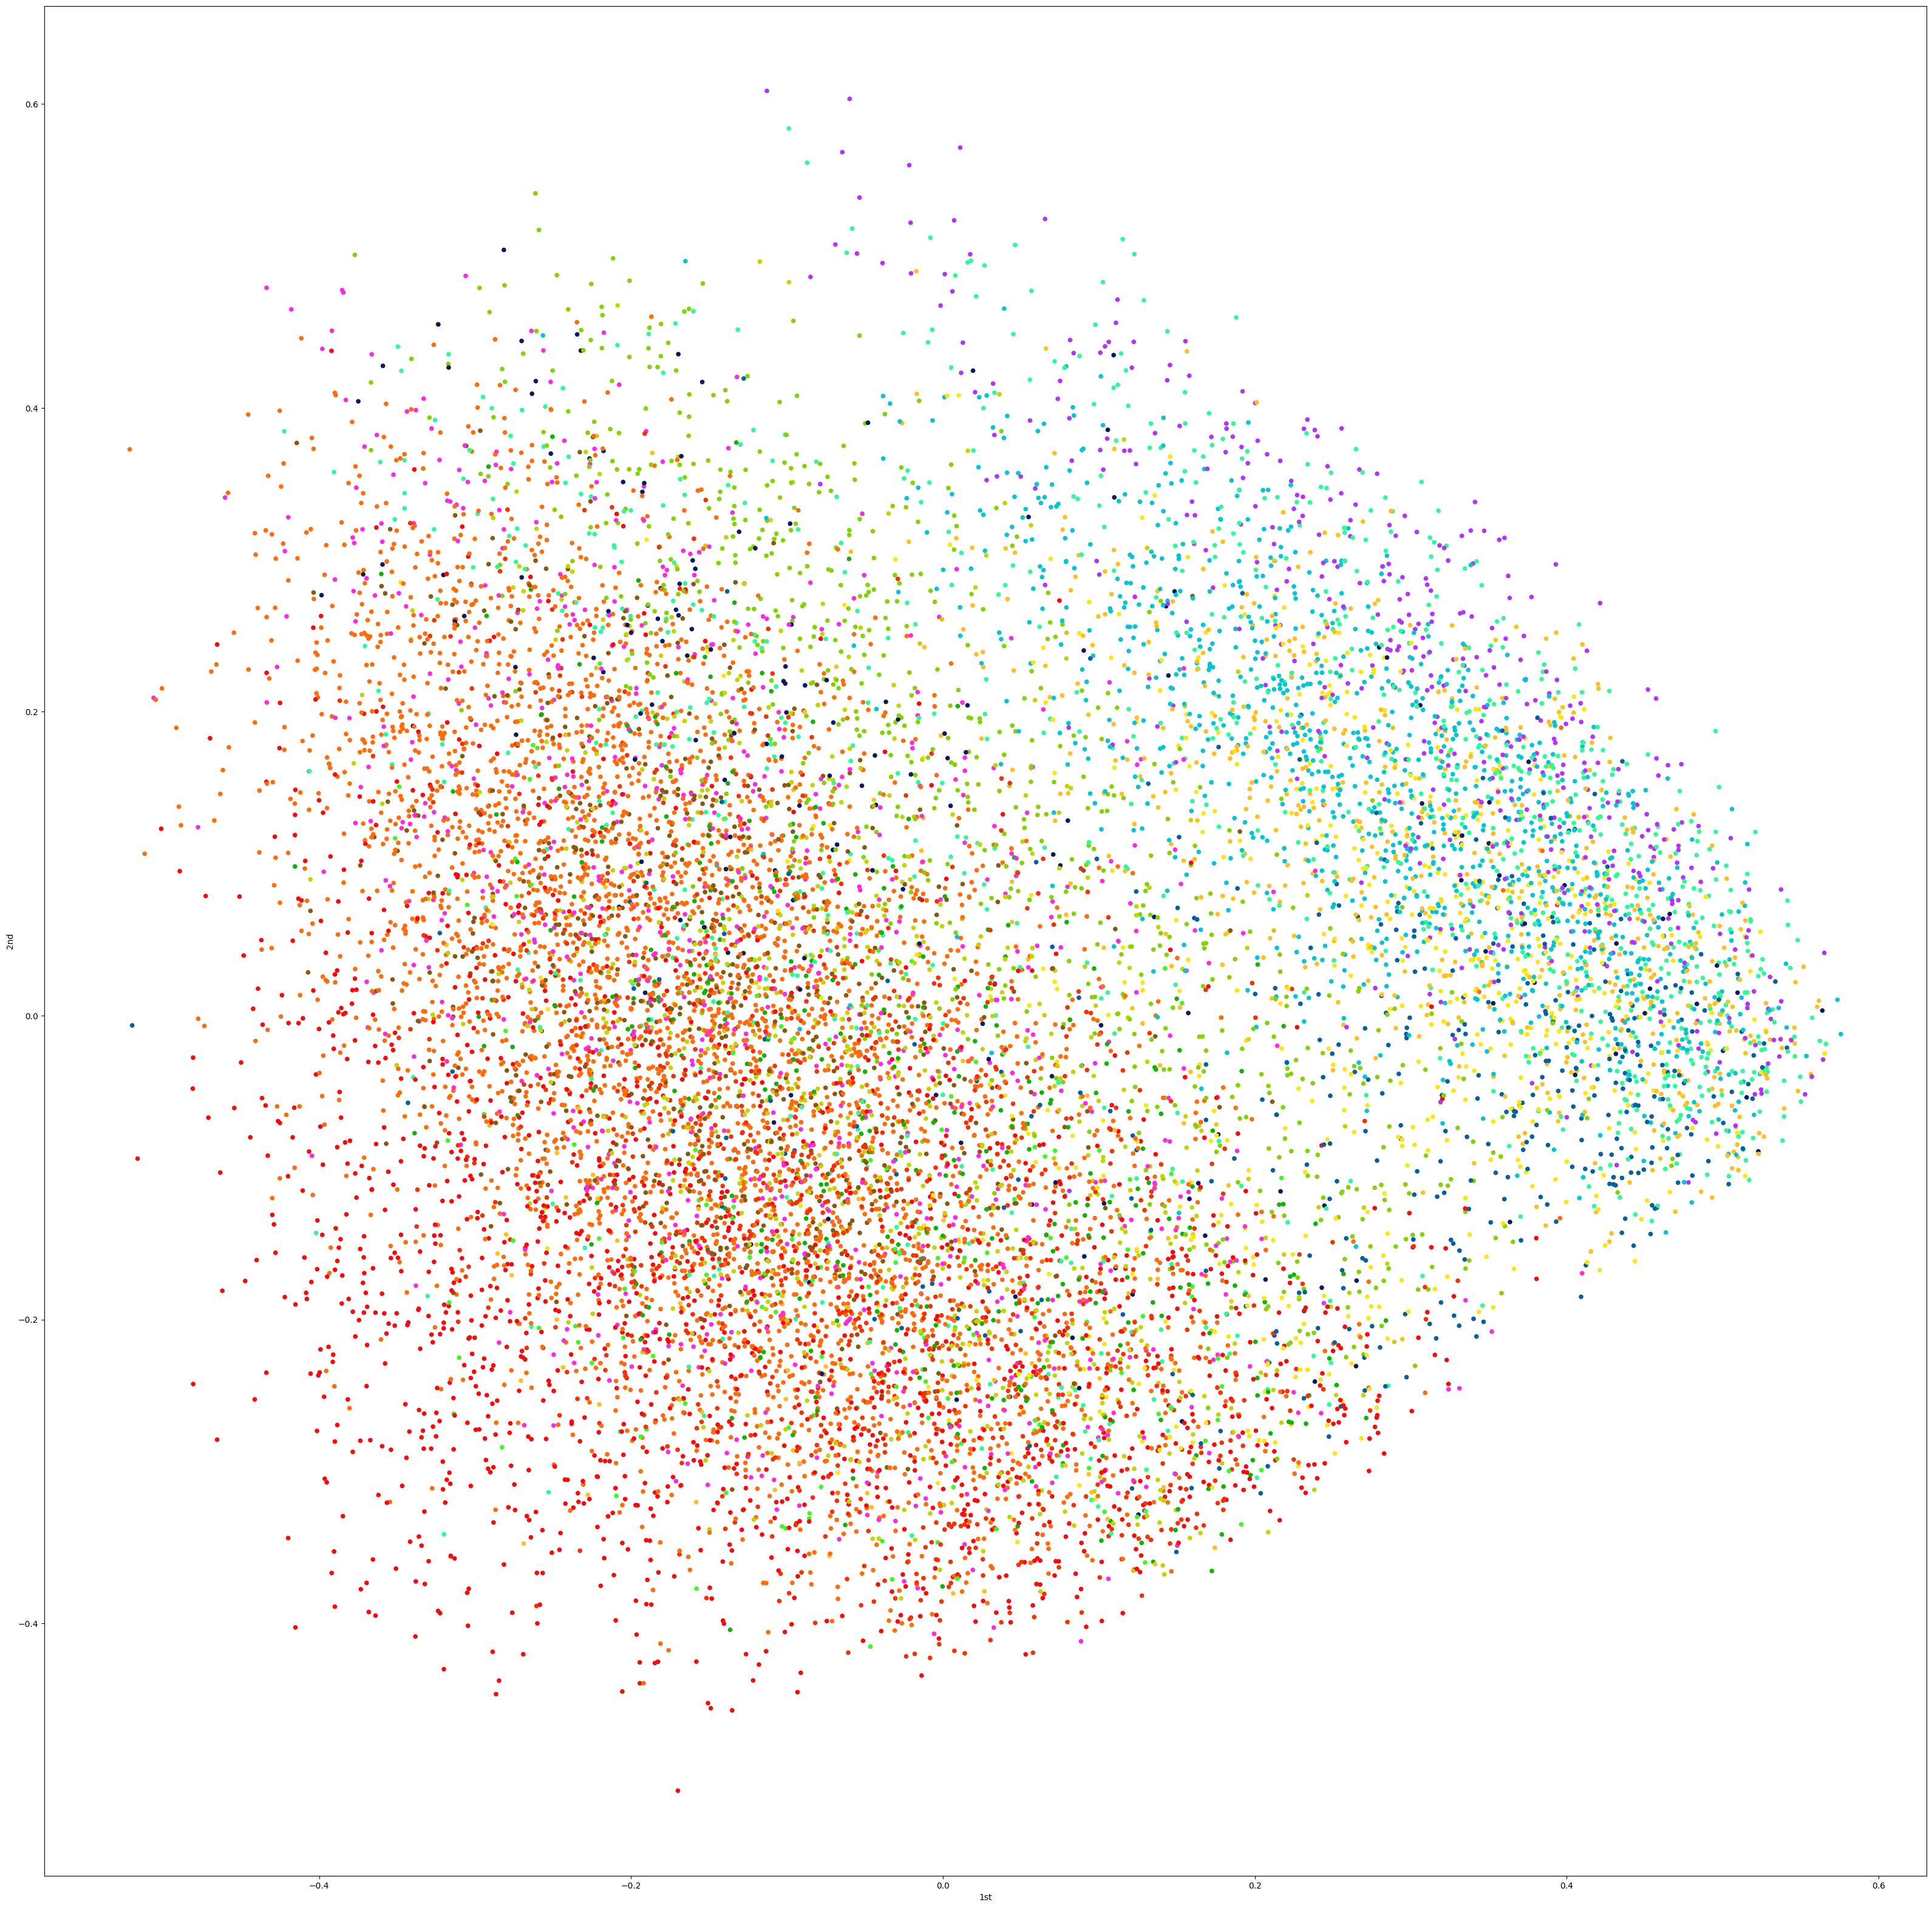

In [ ]:
ax = ds_points_df.plot(kind='scatter', x='1st', y='2nd', c='c', figsize=(40, 40))
# for title, points in ds_points_df.iterrows():
  # ax.annotate(title, points)

In [ ]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

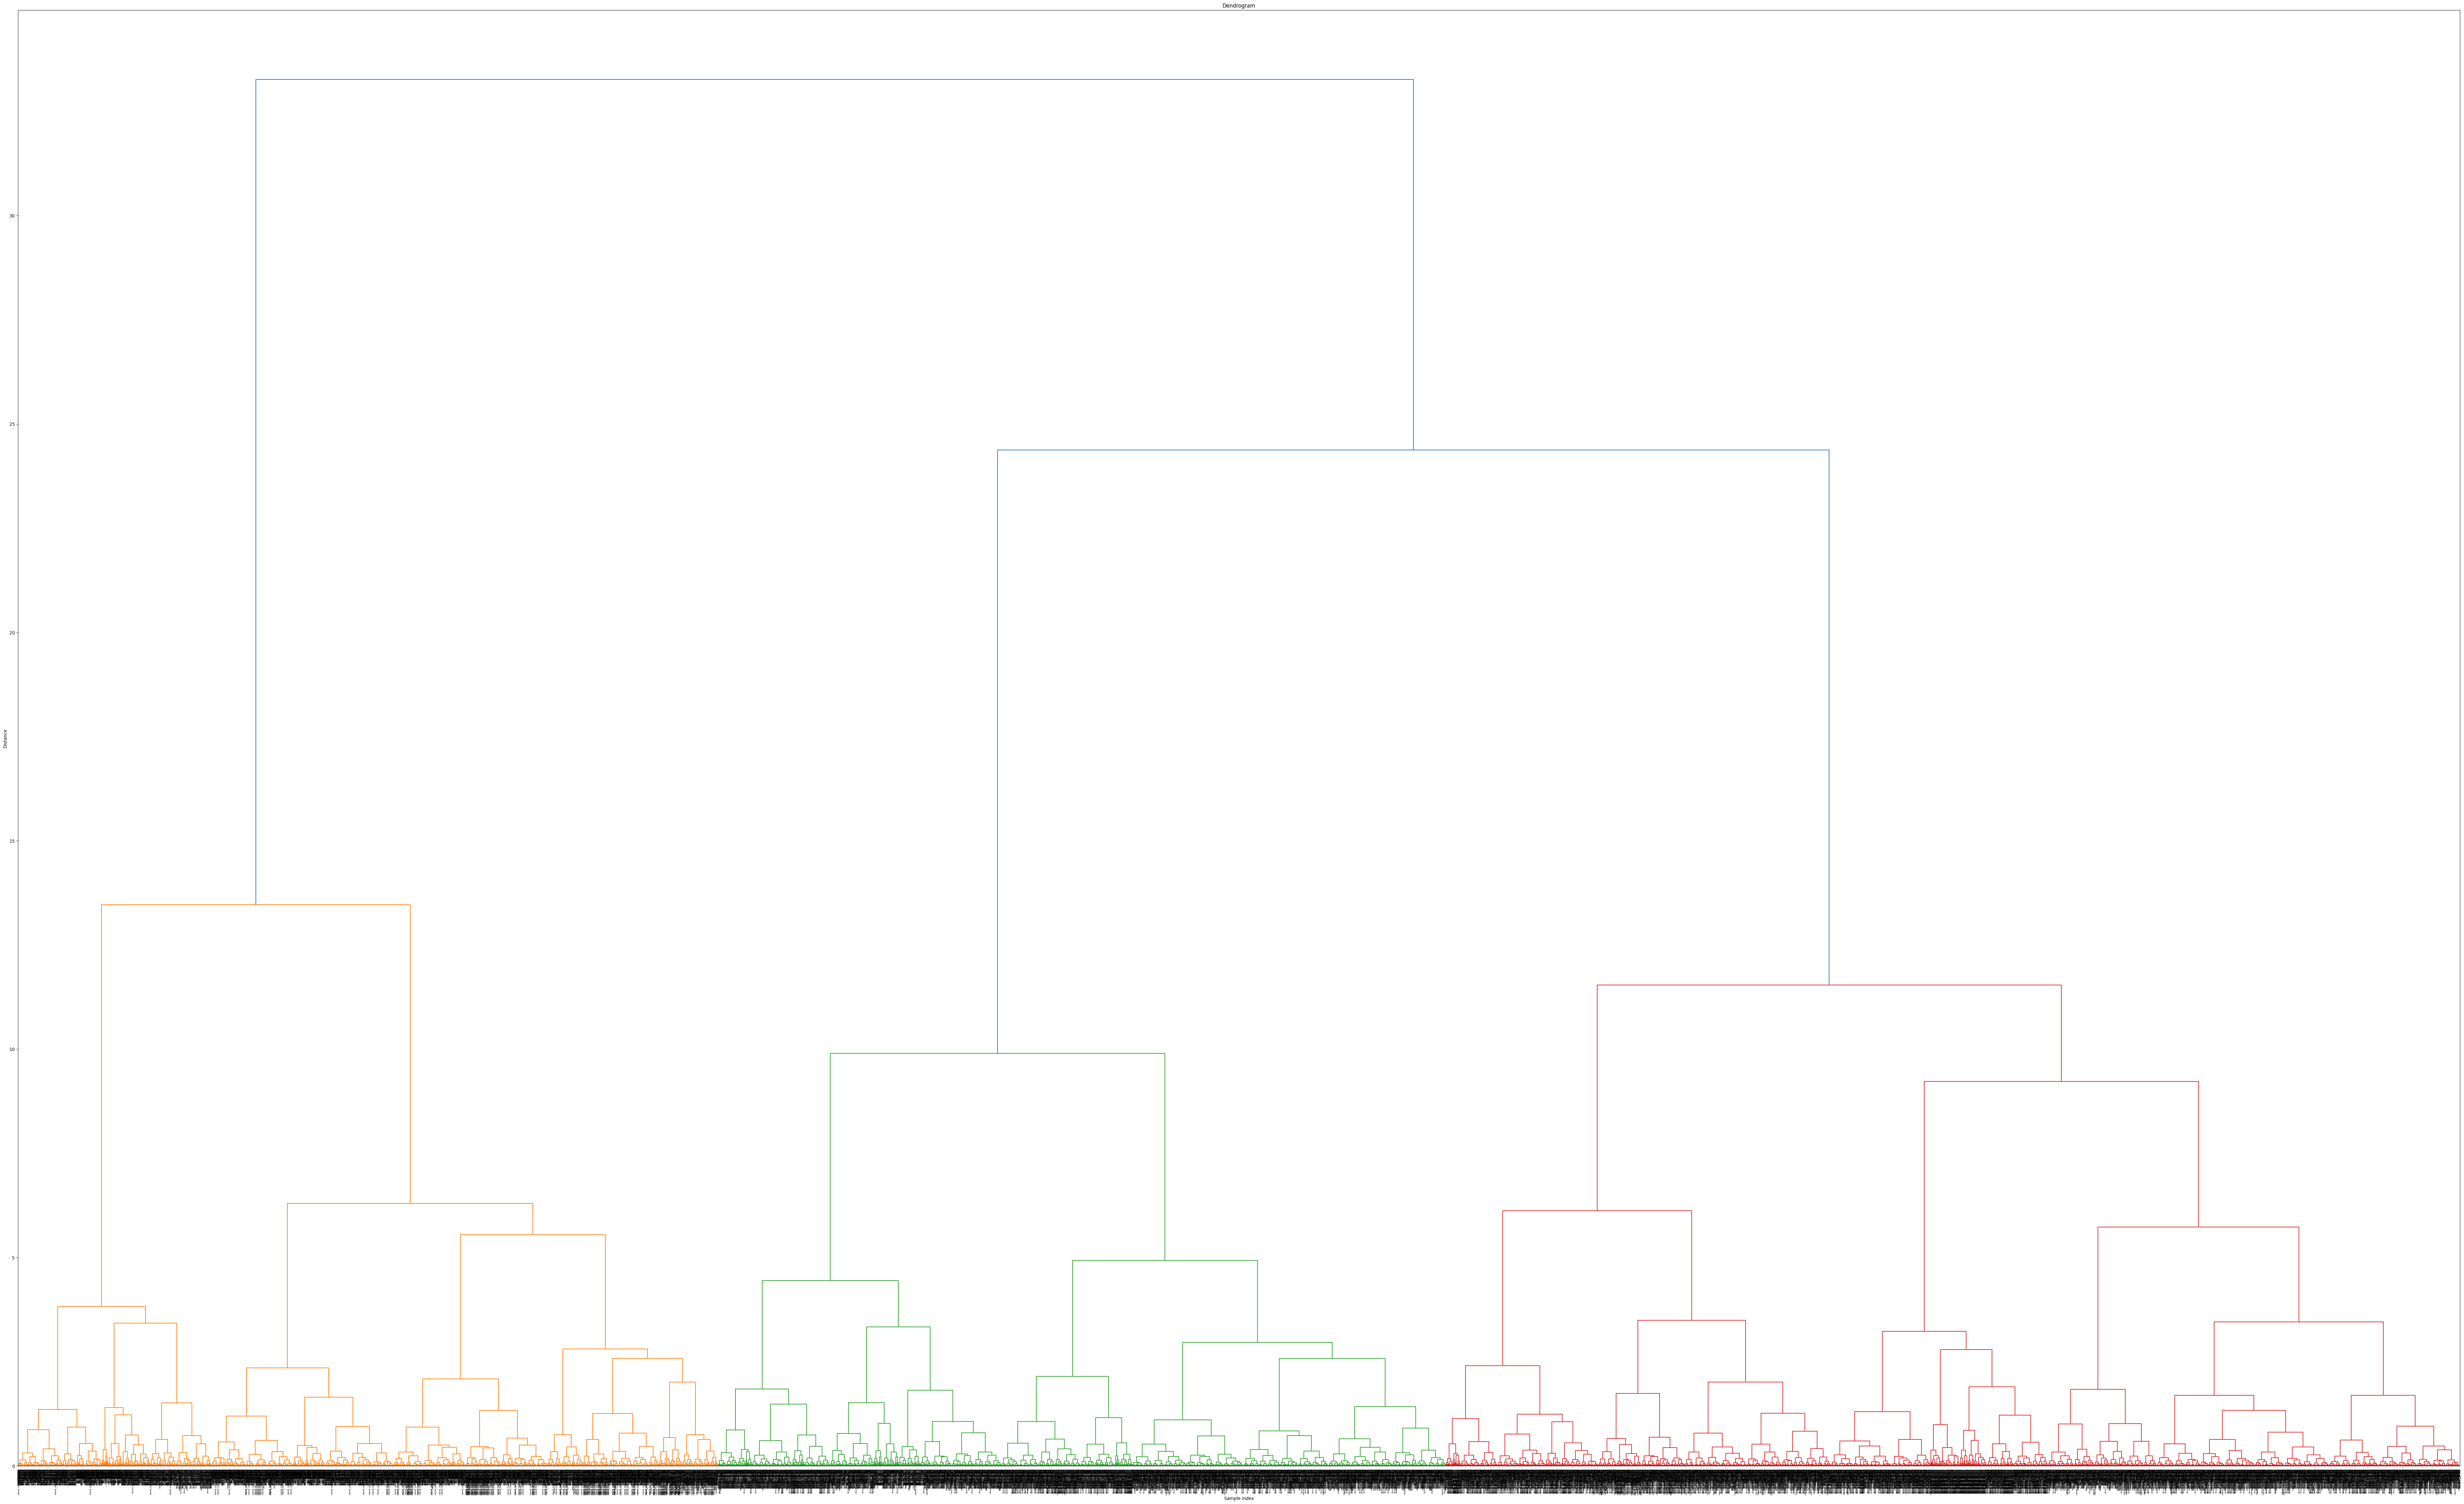

In [ ]:
dend_df = ds_points_df.drop(columns=['c'])
Z = hierarchy.linkage(dend_df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(100, 60))
dn = hierarchy.dendrogram(Z, labels=dend_df.index)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()
